In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

# np.seterr(all='ignore')

In [2]:
magnetic_field = np.linspace(-.5,.5,500)
# print(magnetic_field)
Δ_2Ef = 0

In [3]:
lφ = 300 * 1e-9 # original 300
lm = 1000 * 1e-9 # original 1000

nm = 1e25 # undetermined
n0 = 1e25 # undetermined
u0 = 1e-8 # undetermined
ux = 1e-5 # undetermined
uz = ux # undetermined

hbar = 1.05e-34 #*1e18

In [4]:
γ = 1
# perhaps my slider is here : Update : it isn't

# k = 1 # undetermined possibly solve for k before proceeding : Update : isn't required at all
# c = 3e8
# vf = γ / hbar
# g = 2
mu_B = 9.27e-24 #*1e18
# mu_B = 1
# m0 = 9.1e-31
# Ef = m0*(vf**2*c**2-vf**4+c**4)**.5
e = 1.6e-19
# e = 1
Ef = 5 *e  # eV to J

In [5]:
Nf = Ef/(2*np.pi*γ**2)

def hz_Ef(B, Db2Ef):
    return B/Ef*mu_B + Db2Ef

def a2(B, Db2Ef):
    return 1/2 + hz_Ef(B, Db2Ef)/2

def b2(B, Db2Ef):
    return 1/2 - hz_Ef(B, Db2Ef)/2

def sin2theta(B, Db2Ef): # sin^2(ϑ)
    return 4* a2(B, Db2Ef) * b2(B,Db2Ef)

# def θ(B, Db2Ef):
#     return np.arccos( hz(B,Db2Ef) / np.sqrt( hz(B,Db2Ef)**2 + γ**2*k**2 ) )

# def a2(B, Db2Ef):
#     return hz(B,Db2Ef) / np.sqrt( hz(B,Db2Ef)**2 + γ**2*k**2 ) 

# def b2(B, Db2Ef):
#     return γ**2*k**2 / np.sqrt( hz(B,Db2Ef)**2 + γ**2*k**2 ) 

# def aa(B, Db2Ef):
#     return np.cos( θ(B,Db2Ef)/2 )

# def bb(B, Db2Ef):
#     return np.sin( θ(B,Db2Ef)/2 )

def τm(B, Db2Ef):
    return ( 2 / τx(B, Db2Ef) + 1 / τz(B, Db2Ef) ) **-1

def τe(B, Db2Ef):
    return hbar / (2 * np.pi * Nf * n0 * u0**2 * (a2(B,Db2Ef)**2 + b2(B,Db2Ef)**2))

def τz(B, Db2Ef):
    return hbar / (2 * np.pi * Nf * nm * uz**2 * (a2(B,Db2Ef)**2 + b2(B,Db2Ef)**2))

def τx(B, Db2Ef):
    return hbar / (2 * np.pi * Nf * nm * ux**2 * (2* a2(B,Db2Ef) * b2(B,Db2Ef)))

def DD(B, Db2Ef):
    return lm**2 / τm(B,Db2Ef)

def τ(B, Db2Ef):
    return hbar * γ**2 / Ef / (nm*ux**2* (4*a2(B, Db2Ef)*b2(B, Db2Ef)) + (nm*uz**2+n0*u0**2)*(a2(B, Db2Ef)**2 + b2(B, Db2Ef)**2))

# def τ(B, Db2Ef):
#     return (1/τe(B, Db2Ef) + 1/τm(B, Db2Ef))**-1

def le2(B, Db2Ef):
    return DD(B,Db2Ef) * τe(B,Db2Ef)

def ηv(B, Db2Ef):
    return (1 - τ(B,Db2Ef)/2 * (1/τe(B,Db2Ef) - 1/τz(B,Db2Ef)) * 2*a2(B,Db2Ef)*b2(B,Db2Ef) / (a2(B,Db2Ef)**2 + b2(B,Db2Ef)**2))**-1

def ηH(B, Db2Ef):
    return -1/2* (1- 1/ηv(B, Db2Ef) - τ(B, Db2Ef)/τx(B, Db2Ef))

def g0(B, Db2Ef):
    return 2*( (a2(B,Db2Ef)**2 + b2(B,Db2Ef)**2) / a2(B,Db2Ef)**2 * 1/τ(B,Db2Ef) / ( 1/τe(B,Db2Ef) + 1/τz(B,Db2Ef) ) -1)

def g2(B, Db2Ef):
    return 2*( (a2(B,Db2Ef)**2 + b2(B,Db2Ef)**2) / b2(B,Db2Ef)**2 * 1/τ(B,Db2Ef) /( 1/τe(B,Db2Ef) + 1/τz(B,Db2Ef) ) -1)

def g1(B, Db2Ef):
    return 2*( 1/τ(B,Db2Ef) / ( ( 1/τe(B,Db2Ef) - 1/τz(B,Db2Ef) ) * 2*a2(B,Db2Ef)*b2(B,Db2Ef) / ( a2(B,Db2Ef)**2 + b2(B, Db2Ef)**2 ) - 2/τx(B, Db2Ef) ) -1)

def lb2(B, Db2Ef):
    return np.abs(hbar/(4*e*B))

def l2(B, Db2Ef):
    return 1/ ( 1/le2(B,Db2Ef) + 1/lm**2 )

def α1(B, Db2Ef):
    return -ηv(B,Db2Ef)**2 * ( 1 + 2*ηH(B,Db2Ef) ) / 2 / (1 + g0(B,Db2Ef)**-1 + g2(B,Db2Ef)**-1)

def α0(B, Db2Ef):
    return ηv(B,Db2Ef)**2 * ( 1 + 2*ηH(B,Db2Ef) ) / 2 / (1 + g1(B,Db2Ef)**-1)

def l12(B, Db2Ef):
    return 2*l2(B,Db2Ef) * sin2theta(B,Db2Ef)**2 * (1 + g0(B,Db2Ef)**-1 + g2(B,Db2Ef)**-1) / g1(B,Db2Ef)

def l02(B, Db2Ef):
    return 2*l2(B,Db2Ef) * sin2theta(B,Db2Ef)**2 * (1 + g1(B,Db2Ef)**-1) / g0(B,Db2Ef)

In [6]:
# def arguments(B, Db2Ef):
#     return np.array([lb2(B, Db2Ef)/lφ**2 + lb2(B, Db2Ef)/l02(B, Db2Ef), lb2(B, Db2Ef)/lφ**2 + lb2(B, Db2Ef)/l12(B, Db2Ef)])

def Δσ(B, Db2Ef):
    # term = lambda n: eval(f' α{n} * ( special.polygamma(0, lb2(B, Db2Ef)/lφ**2 + lb2(B, Db2Ef)/l{n}2(B,Db2Ef) +1/2) - np.log(lb2(B, Db2Ef)/lφ**2 + lb2(B, Db2Ef)/l{n}2(B,Db2Ef)) )')
    # return (  α0(B,Db2Ef) * ( special.polygamma(0, np.abs(lb2(B, Db2Ef)/lφ**2 + lb2(B, Db2Ef)/l02(B, Db2Ef) +1/2)) - np.log(np.abs(lb2(B, Db2Ef)/lφ**2 + lb2(B, Db2Ef)/l02(B, Db2Ef))) ) +  α1(B,Db2Ef) * ( special.polygamma(0, np.abs(lb2(B, Db2Ef)/lφ**2 + lb2(B, Db2Ef)/l12(B, Db2Ef) +1/2) ) - np.log(np.abs(lb2(B, Db2Ef)/lφ**2 + lb2(B, Db2Ef)/l12(B, Db2Ef))) ) )/np.pi
    return (  α0(B,Db2Ef) * ( special.polygamma(0, lb2(B, Db2Ef)/lφ**2 + lb2(B, Db2Ef)/l02(B, Db2Ef) +1/2) - np.log(lb2(B, Db2Ef)/lφ**2 + lb2(B, Db2Ef)/l02(B, Db2Ef)) ) +  α1(B,Db2Ef) * ( special.polygamma(0, lb2(B, Db2Ef)/lφ**2 + lb2(B, Db2Ef)/l12(B, Db2Ef) +1/2) - np.log(lb2(B, Db2Ef)/lφ**2 + lb2(B, Db2Ef)/l12(B, Db2Ef)) ) )/np.pi

In [7]:
# # Δσ(magnetic_field,0)
# args = arguments(magnetic_field, 0)
# plt.ylim(-1/8,1/8)
# plt.plot(magnetic_field, args[0])
# plt.plot(magnetic_field, args[1])
# plt.show()

C:\Users\freak\AppData\Local\Temp\ipykernel_13912\4152040637.py:15: RuntimeWarning: invalid value encountered in sqrt
  ax[1].plot(db2ef, np.sqrt(l12(0, db2ef))*1e9, label='$L_1$') # L1 does not exist?
C:\Users\freak\AppData\Local\Temp\ipykernel_13912\4152040637.py:20: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(0,1e3)


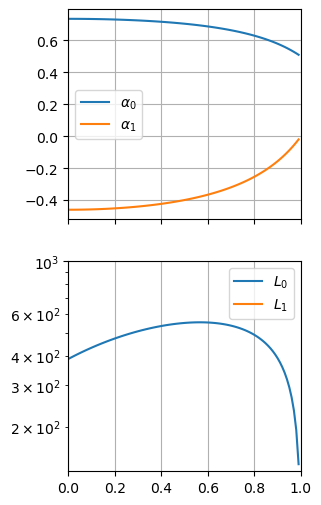

In [8]:
%matplotlib inline

fig, ax = plt.subplots(2,figsize=(3,6),sharex=True)

db2ef = np.arange(0,1,0.01)
ax[0].plot(db2ef, α0(0,db2ef), label='$α_0$')
ax[0].plot(db2ef, α1(0,db2ef), label='$α_1$')
ax[0].legend(loc='center left')
ax[1].plot(db2ef, np.sqrt(l02(0, db2ef))*1e9, label='$L_0$')
# ax[0].set_ylim(-.5,.5)
ax[0].grid(True)
ax[0].set_xlim(0,1)
ax[1].set_xlim(0,1)
# ax[0].set_ylim(0.5,1)
ax[1].plot(db2ef, np.sqrt(l12(0, db2ef))*1e9, label='$L_1$') # L1 does not exist?
# ax[1].plot(db2ef, l12(0, db2ef)*1e9, label='$L_1$') # L1 does not exist?
ax[1].grid(True)
ax[1].legend()
ax[1].set_yscale('log')
ax[1].set_ylim(0,1e3)
plt.show()

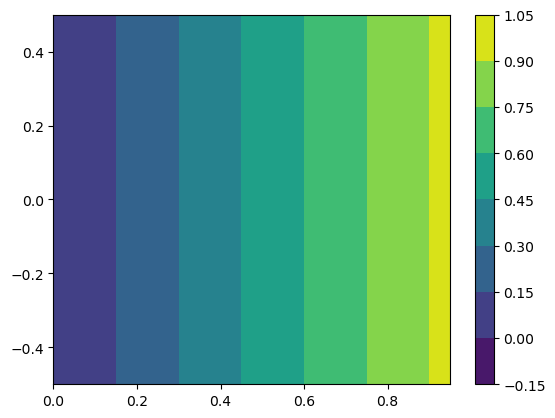

In [9]:
delta = np.arange(0,1,.05)
delta, magnetic_field = np.meshgrid(delta, magnetic_field)
plt.contourf(delta, magnetic_field,hz_Ef(magnetic_field, delta))
plt.colorbar()
plt.show()

C:\Users\freak\AppData\Local\Temp\ipykernel_13912\3792564201.py:7: RuntimeWarning: invalid value encountered in log
  return (  α0(B,Db2Ef) * ( special.polygamma(0, lb2(B, Db2Ef)/lφ**2 + lb2(B, Db2Ef)/l02(B, Db2Ef) +1/2) - np.log(lb2(B, Db2Ef)/lφ**2 + lb2(B, Db2Ef)/l02(B, Db2Ef)) ) +  α1(B,Db2Ef) * ( special.polygamma(0, lb2(B, Db2Ef)/lφ**2 + lb2(B, Db2Ef)/l12(B, Db2Ef) +1/2) - np.log(lb2(B, Db2Ef)/lφ**2 + lb2(B, Db2Ef)/l12(B, Db2Ef)) ) )/np.pi


0.79372


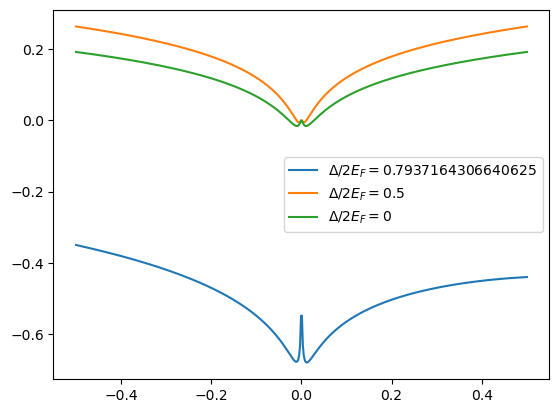

In [12]:
magnetic_field = np.linspace(-.5,.5,500)

# delta1 = 1
# delta = 0
# count = 0
# while np.round(delta1,5) != np.round(delta,5) and count < 1000:
#     count += 1
#     if np.isnan(Δσ(magnetic_field, delta1)).any() and not np.isnan(Δσ(magnetic_field, delta)).any():
#         if np.isnan(Δσ(magnetic_field, (delta1+delta)/2 )).any():
#             delta1 = (delta1+delta)/2
#         else:
#             delta = (delta1+delta)/2

# print(np.round(delta,5))
delta = .999
plt.plot(magnetic_field, Δσ(magnetic_field, delta),label=f'$\Delta/2E_F={delta}$')
delta = .5
plt.plot(magnetic_field, Δσ(magnetic_field, delta),label=f'$\Delta/2E_F={delta}$')
delta = 0
plt.plot(magnetic_field, Δσ(magnetic_field, delta),label=f'$\Delta/2E_F={delta}$')
plt.legend()
# plt.savefig('Δσ(B).png')
plt.show()

Δ/2Ef = 0.999 won't plot

Plot centre is a little offset. Why?

## Debugging

In [ ]:
# import itertools

# def hz_gen(delta, dummy):
#     for cnt in itertools.count():
#         global γ
#         γ = cnt/10
#         yield γ, hz(mag, delta)

In [ ]:
# assert 0

In [ ]:
# Δσ(np.pi,np.pi)

test_values = (0.01,0.5)

import types
funcs = [f for f in globals().values() if type(f) == types.FunctionType][1:]

print([f for f in funcs if np.isnan(f(*test_values))])
# print([f(*test_values) for f in funcs])# if f(*test_values)==np.NAN])
# print(funcs[-1])

In [ ]:
# term = lambda n: f' α{n}(B,Db2Ef) * ( special.polygamma(0, lb2(B, Db2Ef)/lφ**2 + lb2(B, Db2Ef)/l{n}2(B, Db2Ef) +1/2) - np.log(lb2(B, Db2Ef)/lφ**2 + lb2(B, Db2Ef)/l{n}2(B, Db2Ef)) )'
# print(f'return ( {term(0)} + {term(1)} )/np.pi')

In [ ]:
special.polygamma(0, lb2(*test_values)/lφ**2 + lb2(*test_values)/l12(*test_values) +1/2)

In [ ]:
np.log(lb2(*test_values)/lφ**2 + lb2(*test_values)/l12(*test_values))

In [ ]:
import pandas as pd

pd.DataFrame([[i.__name__ for i in funcs], [f(*test_values) for f in funcs]]).T

field = np.arange(-.5,.5,0.01)
delta = 0
for i in funcs:
    with open(f'function_outputs\\{i.__name__}.txt','w') as file:
        file.write(str(i(field,delta)))